In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv.zip')
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [3]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [4]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
df = df.drop(columns=["Patient Id", "Patient First Name", "Family Name", "Father's name"],  axis=1)

In [7]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='ob

In [8]:
df["Genes in mother's side"].head()

,Genes in mother's side
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [9]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(exclude=np.number)


In [10]:
df.isnull().sum()

,0
Patient Age,1427
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Blood cell count (mcL),0
Mother's age,6036
Father's age,5986
Institute Name,5106
Location of Institute,0


In [11]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

In [12]:
num.isnull().sum()

,0
Patient Age,1427
Blood cell count (mcL),0
Mother's age,6036
Father's age,5986
Test 1,2127
Test 2,2152
Test 3,2147
Test 4,2140
Test 5,2170
No. of previous abortion,2162


In [13]:
num.fillna(num.mean(), inplace=True)
num.isnull().sum()

,0
Patient Age,0
Blood cell count (mcL),0
Mother's age,0
Father's age,0
Test 1,0
Test 2,0
Test 3,0
Test 4,0
Test 5,0
No. of previous abortion,0


In [14]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [15]:
cat.fillna(cat.mode(), inplace=True)
cat.isnull().sum()

,0
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Institute Name,5106
Location of Institute,0
Status,0
Respiratory Rate (breaths/min),2149
Heart Rate (rates/min,2113
Parental consent,2125


In [16]:
for column in cat.columns:
 cat[column].fillna(cat[column].mode()[0], inplace=True)
cat.isnull().sum()

,0
Genes in mother's side,0
Inherited from father,0
Maternal gene,0
Paternal gene,0
Institute Name,0
Location of Institute,0
Status,0
Respiratory Rate (breaths/min),0
Heart Rate (rates/min,0
Parental consent,0


<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Density'>

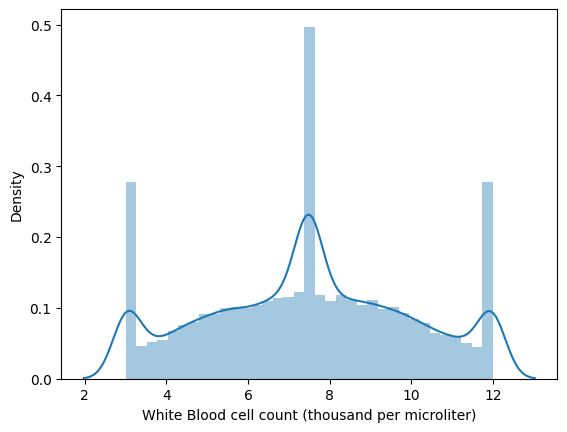

In [17]:
sns.distplot(num['White Blood cell count (thousand per microliter)'])

<Axes: ylabel='Patient Age,Gender'>

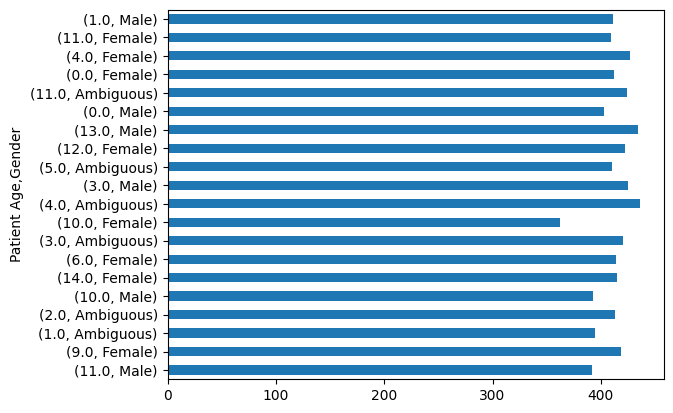

In [19]:
#age and gender
ag = df.groupby('Patient Age')['Gender'].value_counts()
ag

ag2 = ag.sample(20)

ag2.plot(kind='barh',)

In [20]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

<Axes: xlabel="Genes in mother's side", ylabel='count'>

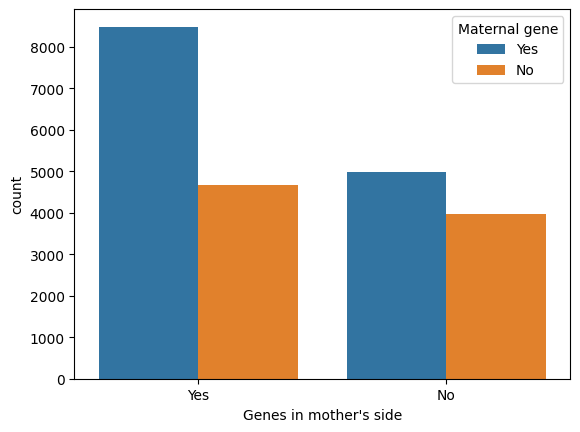

In [21]:
sns.countplot(x="Genes in mother's side", data=cat, hue="Maternal gene")

<Axes: xlabel='Maternal gene', ylabel='count'>

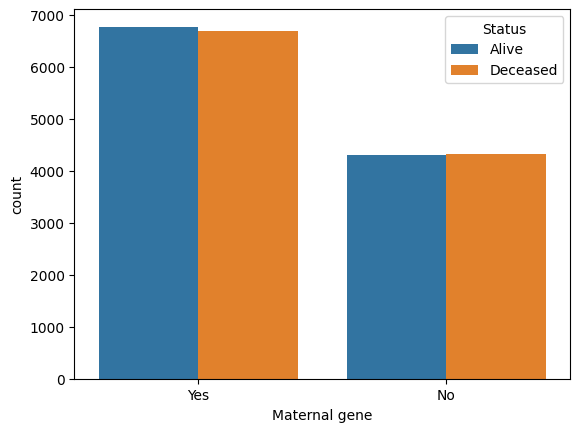

In [22]:
sns.countplot(x="Maternal gene", data=cat, hue="Status")


<Axes: xlabel='Maternal gene', ylabel='count'>

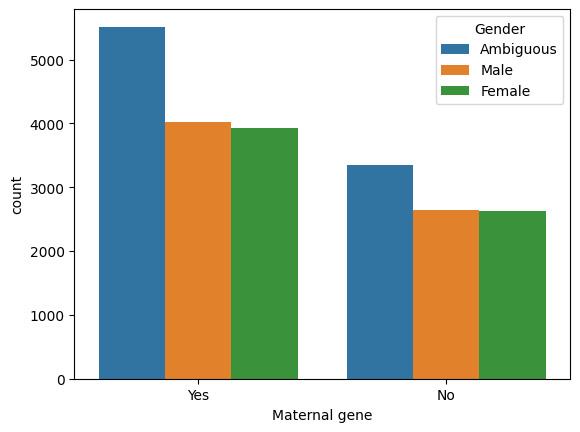

In [23]:
sns.countplot(x="Maternal gene", data=cat, hue="Gender")


<Axes: xlabel='Gender', ylabel='count'>

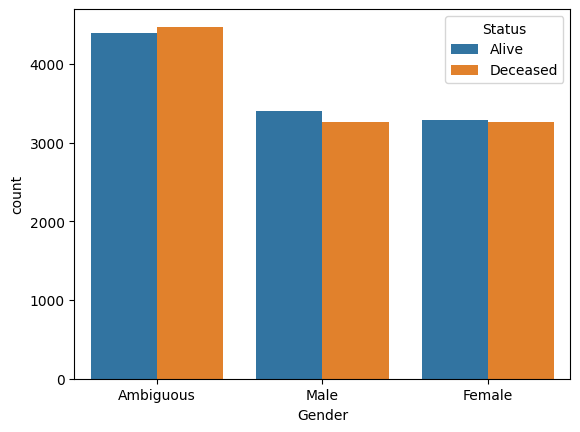

In [24]:
sns.countplot(x="Gender", data=cat, hue="Status")


<Axes: xlabel='Respiratory Rate (breaths/min)', ylabel='count'>

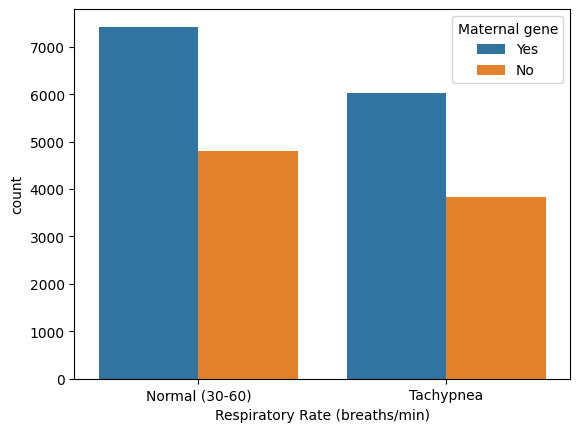

In [25]:
sns.countplot(x="Respiratory Rate (breaths/min)", data=cat, hue="Maternal gene")


<Axes: xlabel='Respiratory Rate (breaths/min)', ylabel='count'>

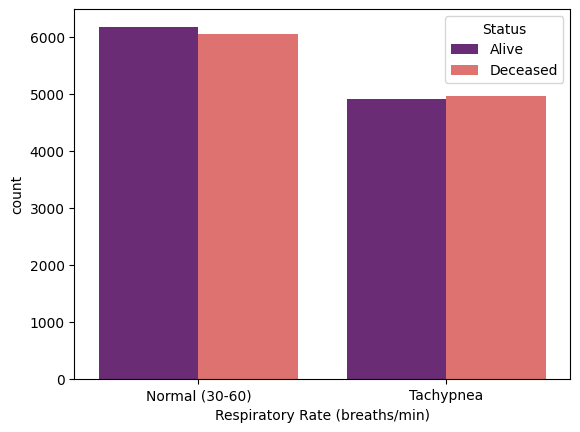

In [26]:
sns.countplot(x="Respiratory Rate (breaths/min)", data=cat, hue="Status", palette='magma')


<Axes: xlabel='Respiratory Rate (breaths/min)', ylabel='count'>

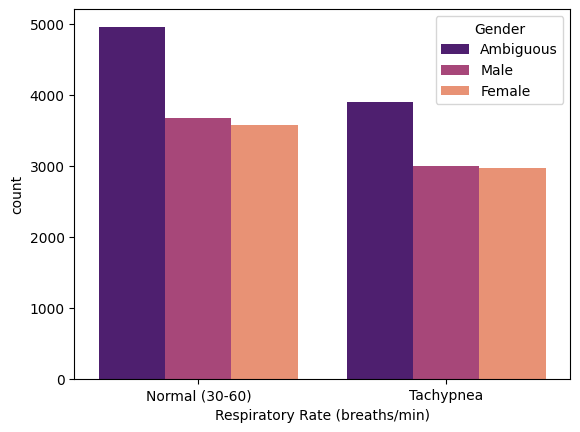

In [27]:
sns.countplot(x="Respiratory Rate (breaths/min)", data=cat, hue="Gender",palette='magma')


<Axes: xlabel='Blood test result', ylabel='count'>

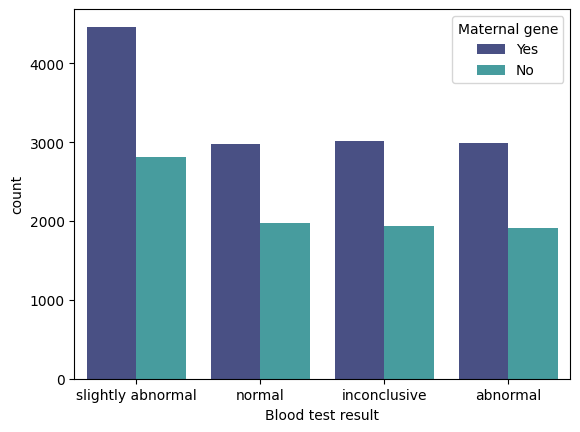

In [28]:
sns.countplot(x="Blood test result", data=cat, hue="Maternal gene", palette='mako')


<Axes: xlabel='Blood test result', ylabel='count'>

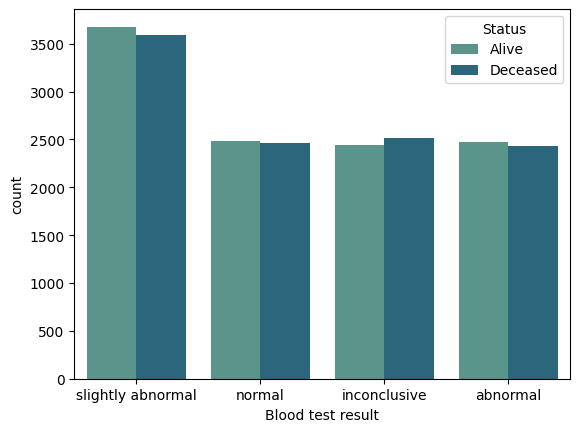

In [29]:
sns.countplot(x="Blood test result", data=cat, hue="Status", palette='crest')


<Axes: xlabel='Blood test result', ylabel='count'>

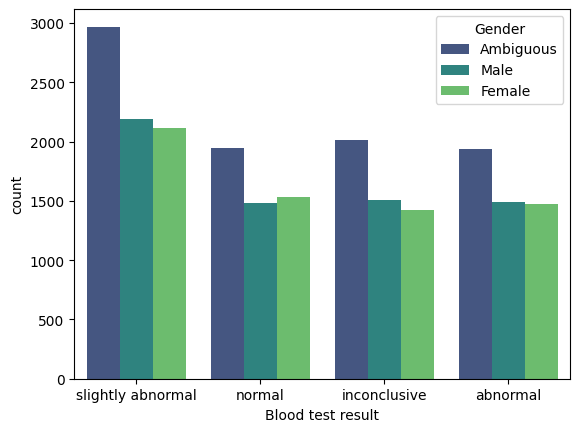

In [30]:
sns.countplot(x="Blood test result", data=cat, hue="Gender", palette = 'viridis')

In [31]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

<Axes: xlabel='Status', ylabel='count'>

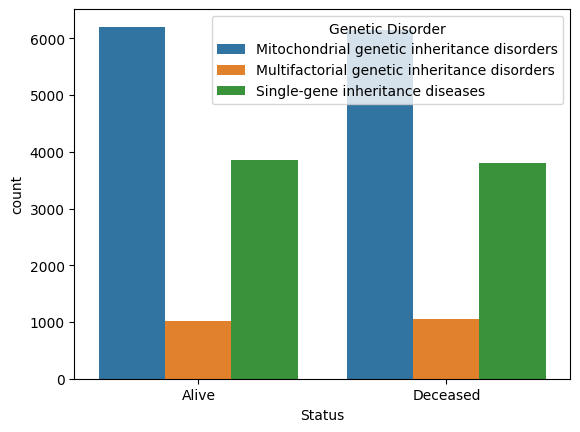

In [32]:
sns.countplot(x="Status", data=cat, hue="Genetic Disorder")

<Axes: xlabel='count', ylabel='Genetic Disorder'>

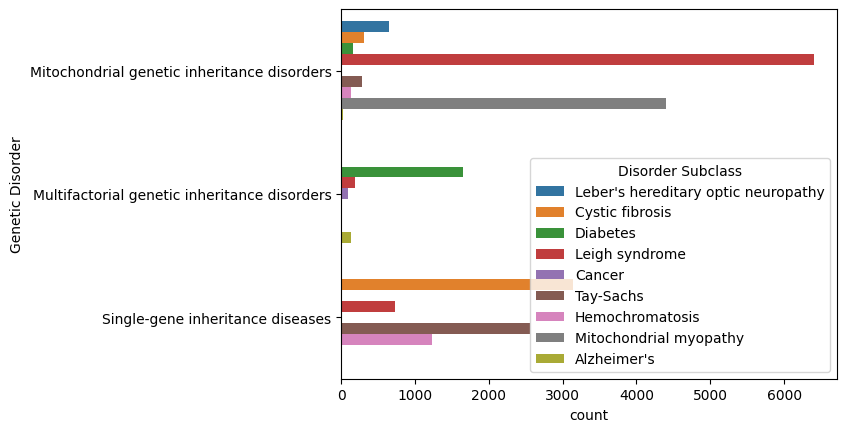

In [33]:
sns.countplot(y="Genetic Disorder", data=cat, hue="Disorder Subclass")

In [34]:
mental = df['H/O serious maternal illness']
mental.head()
mental.dropna(inplace=True)
mental.head()

,H/O serious maternal illness
1,Yes
2,No
3,Yes
4,Yes
5,No


<Axes: ylabel='Blood test result,History of anomalies in previous pregnancies'>

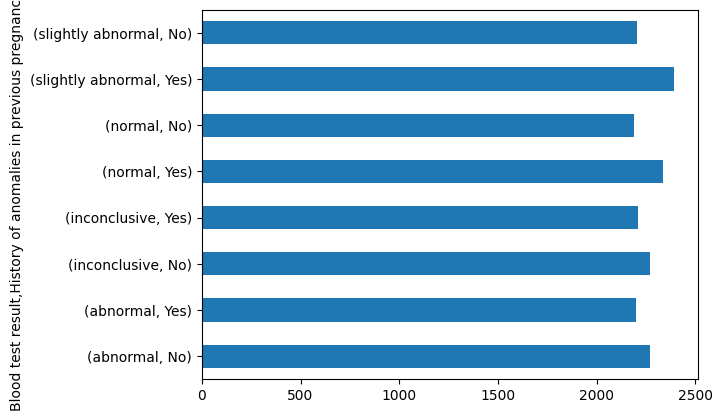

In [35]:
# blood test results and pregnancies

bp = df.groupby('Blood test result')['History of anomalies in previous pregnancies'].value_counts()
bp

bp.plot(kind='barh')

<Axes: xlabel='Blood test result', ylabel='count'>

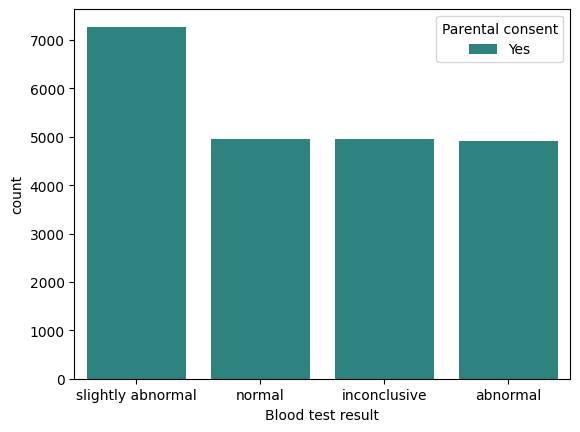

In [36]:
sns.countplot(x="Blood test result", data=cat, hue="Parental consent", palette='viridis')

In [37]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

<Axes: xlabel='Inherited from father', ylabel='count'>

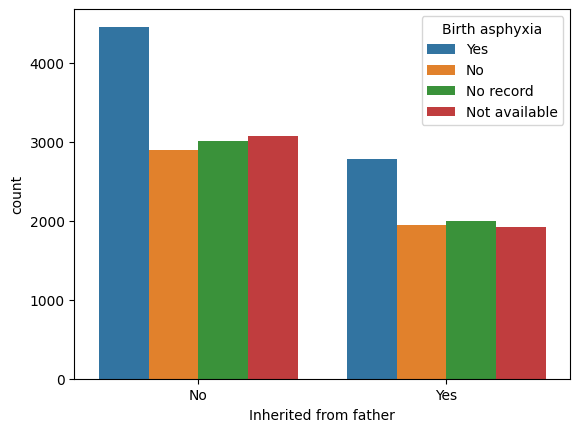

In [38]:
sns.countplot(x="Inherited from father", hue="Birth asphyxia", data=cat)

<Axes: xlabel='Autopsy shows birth defect (if applicable)', ylabel='count'>

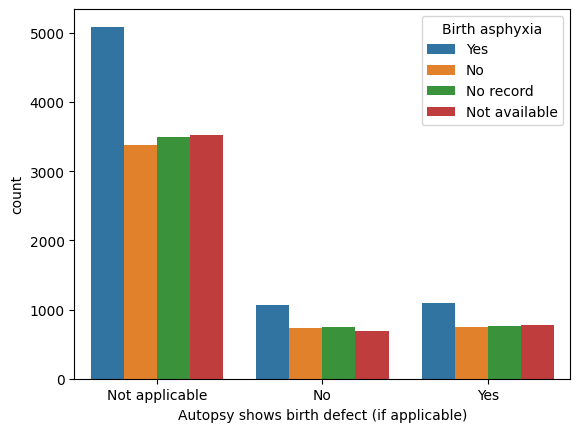

In [39]:
sns.countplot(x="Autopsy shows birth defect (if applicable)", hue="Birth asphyxia", data=cat)

<Axes: xlabel='Birth defects', ylabel='count'>

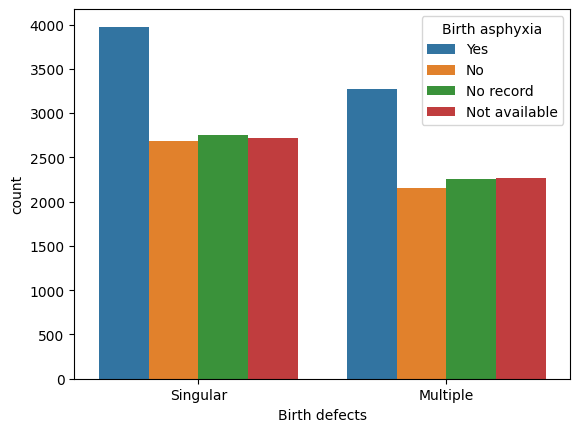

In [40]:
sns.countplot(x="Birth defects", hue="Birth asphyxia", data=cat)

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Count'>

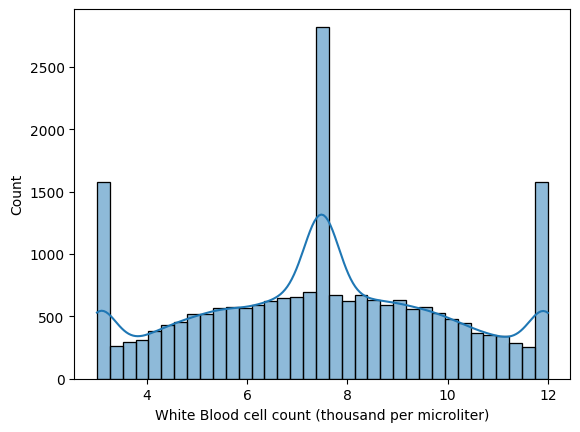

In [41]:
sns.histplot(x='White Blood cell count (thousand per microliter)', kde=True, data=num)

<Axes: xlabel='No. of previous abortion', ylabel='Count'>

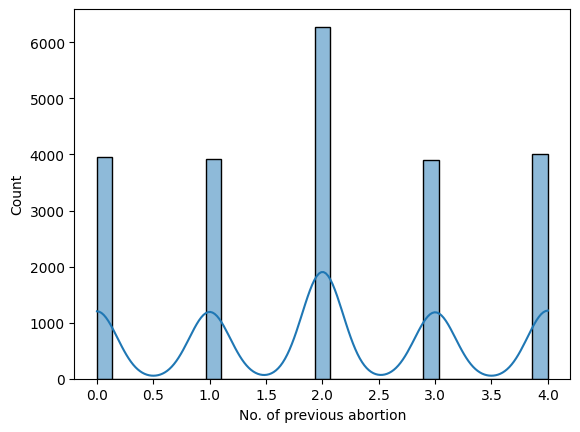

In [42]:
sns.histplot(x='No. of previous abortion', kde=True, data=num)

In [43]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [44]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

<Axes: ylabel='H/O serious maternal illness,H/O substance abuse'>

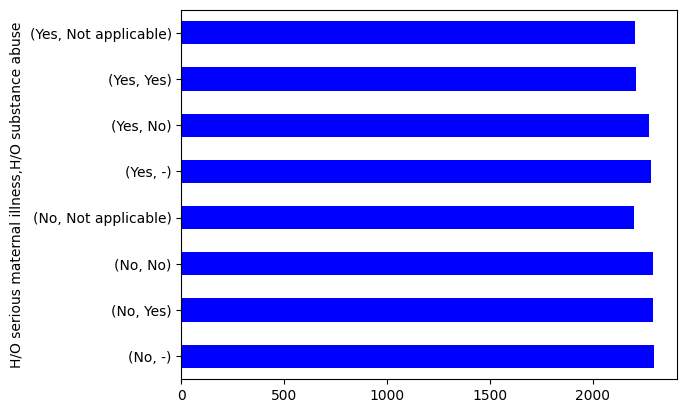

In [45]:
# serious mental illness vs substance use

ss = df.groupby('H/O serious maternal illness')['H/O substance abuse'].value_counts()
ss

ss.plot(kind='barh', color='blue')

In [46]:
columns = df.columns
for col in columns:
  if "Not applicable" in col:
    df.drop(columns=col, inplace=True)

<Axes: ylabel='H/O radiation exposure (x-ray),Birth defects'>

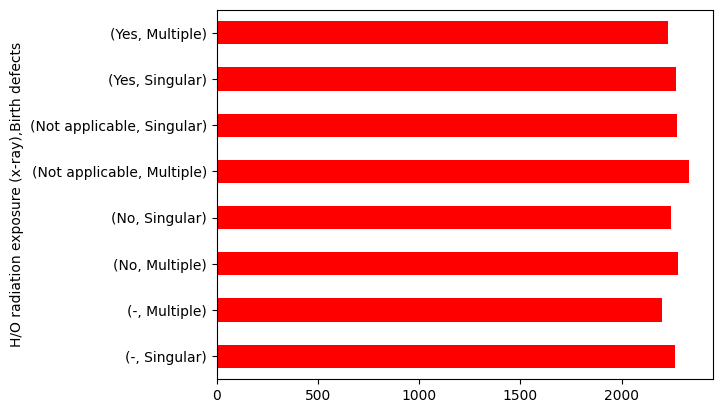

In [47]:
# radiation exposure and birth defects

rb = df.groupby('H/O radiation exposure (x-ray)')['Birth defects'].value_counts()
rb

rb.plot(kind='barh', color='red')

In [48]:
rad = df['H/O radiation exposure (x-ray)']
rad.isna().sum()

2153

In [49]:
df['Birth defects'].value_counts()

,count
Birth defects,
Singular,9977
Multiple,9952


In [50]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='ob

In [51]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

In [52]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

<Axes: xlabel='count', ylabel='Folic acid details (peri-conceptional)'>

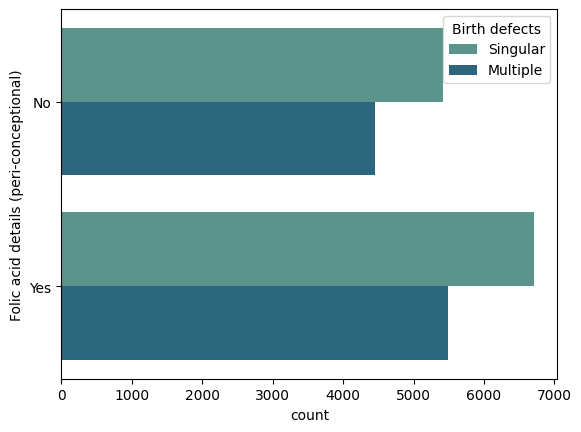

In [53]:
sns.countplot(y="Folic acid details (peri-conceptional)", hue="Birth defects", data=cat, palette='crest')

<Axes: ylabel='Heart Rate (rates/min,Follow-up'>

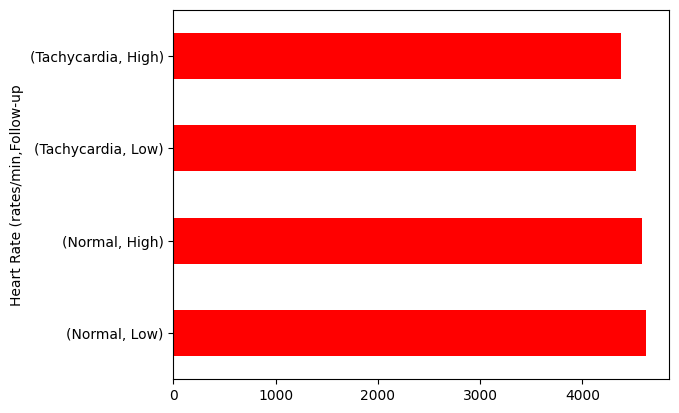

In [54]:
# heart rate, follow up

hf = df.groupby('Heart Rate (rates/min')['Follow-up'].value_counts()
hf

hf.plot(kind='barh', color='red')

In [55]:
tests = df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']]
tests.head()

,Test 1,Test 2,Test 3,Test 4,Test 5
0,0.0,NaN,NaN,1.0,0.0
1,NaN,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [56]:
tests1 = tests.dropna()

In [57]:
tests2 = tests.sample(50)
tests2.head()

,Test 1,Test 2,Test 3,Test 4,Test 5
19881,0.0,0.0,0.0,1.0,0.0
3204,0.0,0.0,0.0,1.0,0.0
16775,0.0,0.0,NaN,1.0,0.0
10537,0.0,0.0,0.0,1.0,0.0
14401,0.0,0.0,0.0,1.0,0.0


In [58]:
genes = df[["Genes in mother's side", "Inherited from father", "Maternal gene",
       "Paternal gene"]]
genes.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene
0,Yes,No,Yes,No
1,Yes,Yes,No,No
2,Yes,No,No,No
3,Yes,No,Yes,No
4,Yes,No,NaN,Yes


In [59]:
symptoms = df[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5']]
symptoms.head()

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,1.0,1.0,1.0,1.0,1.0
1,1.0,NaN,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,NaN


In [60]:
symptoms2 = symptoms.dropna()
symptoms2.head()

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0


In [61]:
symptoms2 = symptoms2.sample(50)


In [62]:
num2 = num.sample(100)
num2 = num2.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5','Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5'], errors='ignore')
num2.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
10376,14.0,4.750030,28.000000,40.0,3.000000,9.313145
6353,6.0,4.567651,35.000000,61.0,2.000000,9.650795
11223,14.0,4.911487,48.000000,29.0,2.003062,6.012206
18956,8.0,4.633470,34.526454,60.0,3.000000,9.129951
6256,6.0,4.744146,19.000000,59.0,4.000000,5.288666


<Axes: >

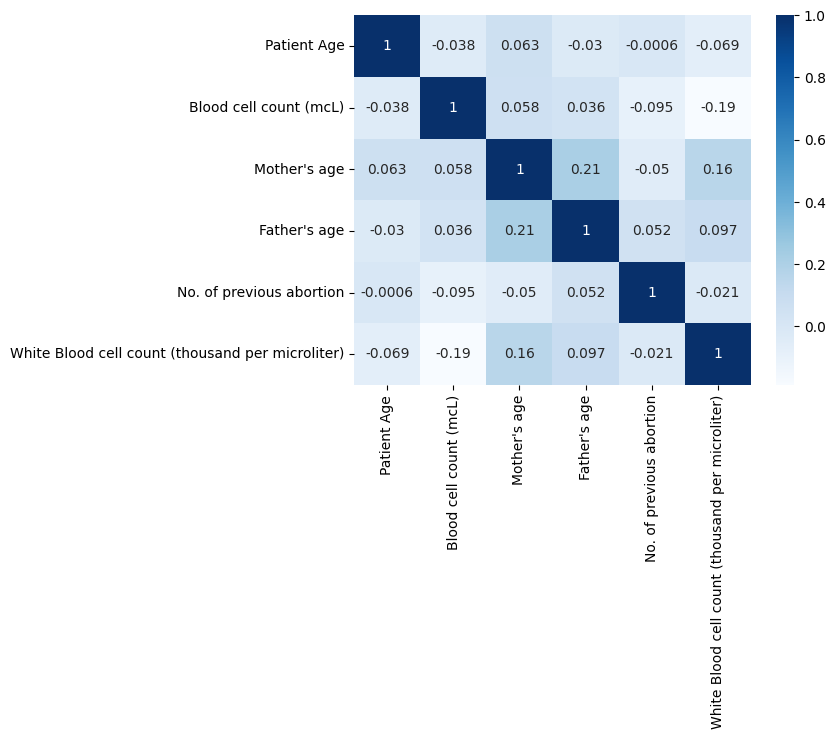

In [63]:
corr_matrix = num2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

In [64]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

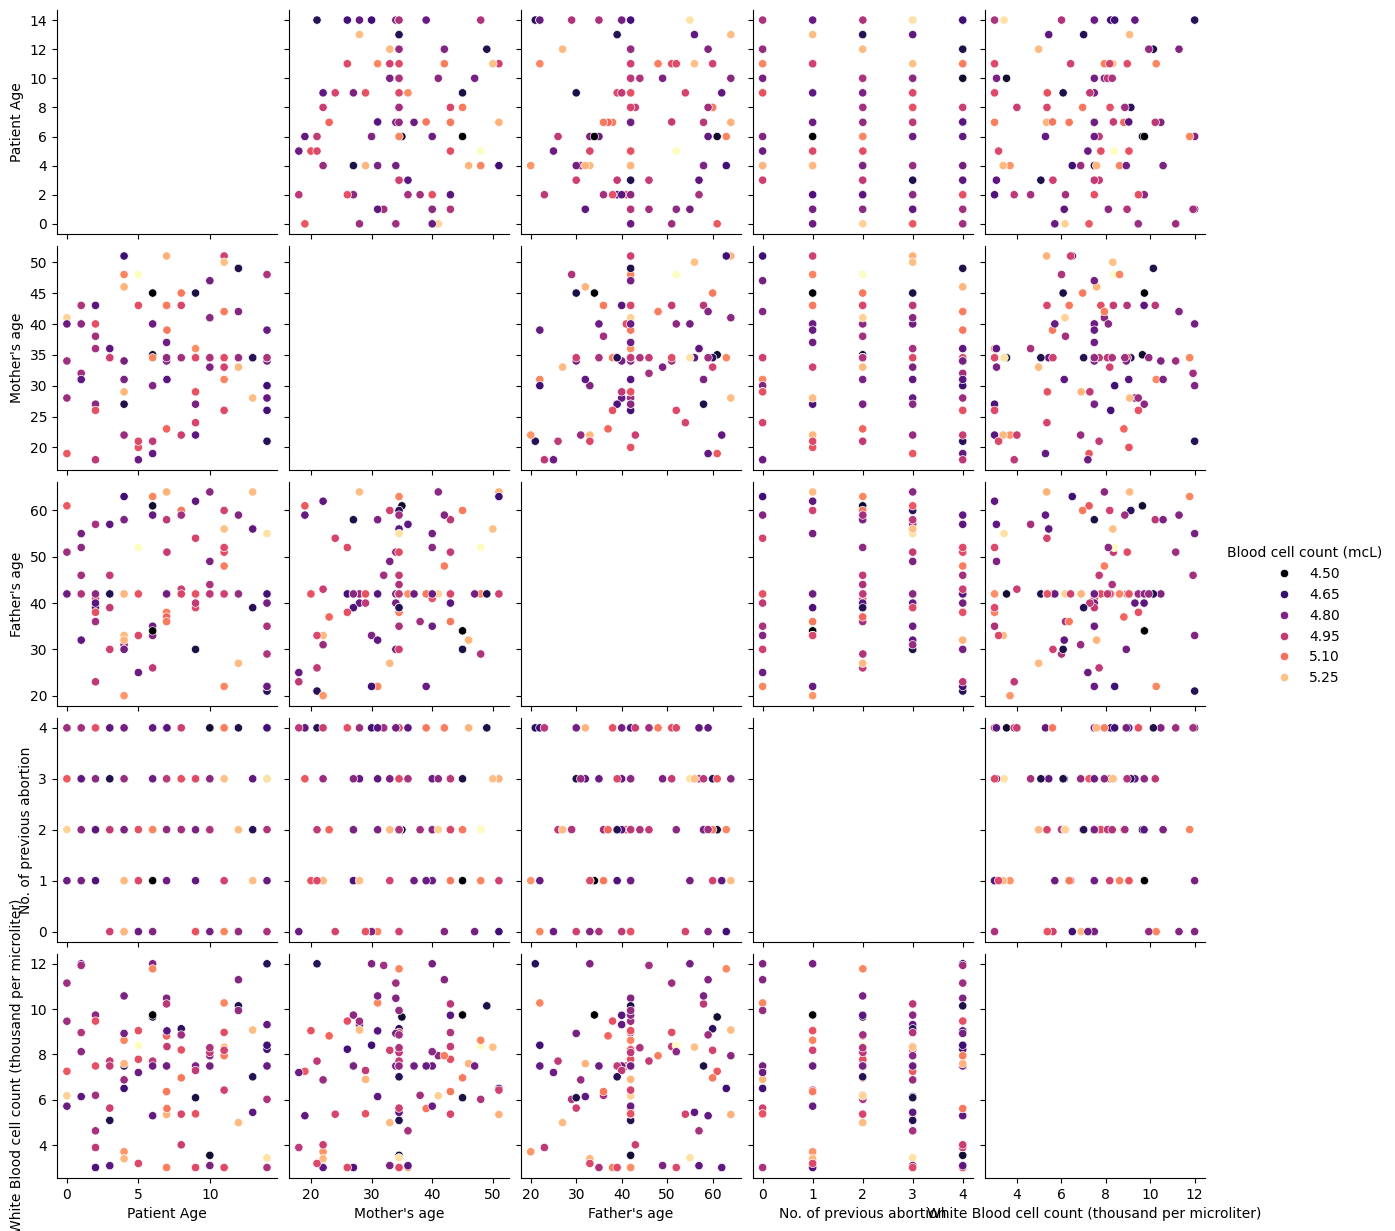

In [65]:
sns.pairplot(num2, diag_kind ='kde',hue ='Blood cell count (mcL)',  palette='magma')

In [66]:
num2.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)'],
      dtype='object')

In [67]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [68]:
gb = df.groupby('Genetic Disorder')['Birth defects'].value_counts()
gb

Genetic Disorder                              Birth defects
Mitochondrial genetic inheritance disorders   Multiple         4666
                                              Singular         4612
Multifactorial genetic inheritance disorders  Singular          978
                                              Multiple          907
Single-gene inheritance diseases              Multiple         3483
                                              Singular         3452
Name: count, dtype: int64

In [69]:
tests = df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']]
tests.head()

,Test 1,Test 2,Test 3,Test 4,Test 5
0,0.0,NaN,NaN,1.0,0.0
1,NaN,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [70]:
tests.fillna(tests.mode(), inplace=True)

In [71]:
tests.head()

,Test 1,Test 2,Test 3,Test 4,Test 5
0,0.0,0.0,0.0,1.0,0.0
1,NaN,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


<Axes: >

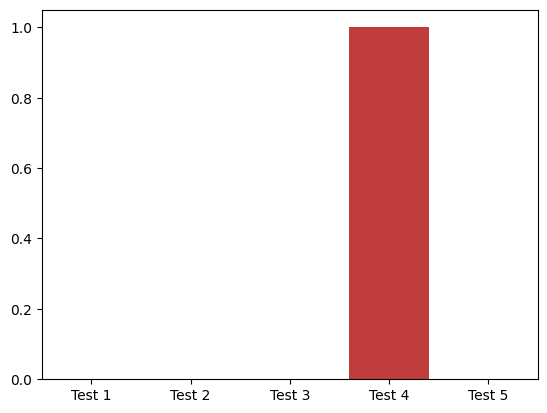

In [72]:
sns.barplot(tests)


In [73]:
tests.value_counts()
tests = num['Test 4']

In [74]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

<Axes: xlabel='No. of previous abortion', ylabel="Mother's age">

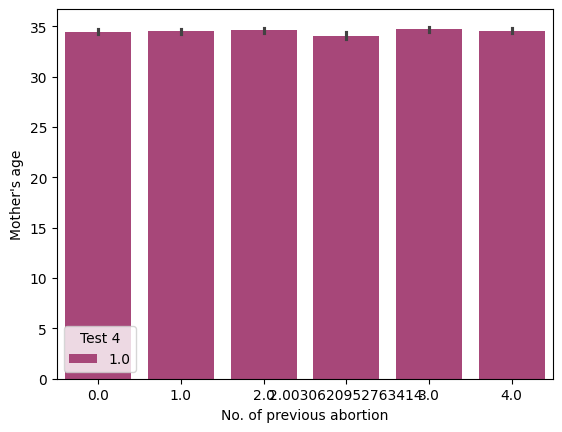

In [75]:
sns.barplot(x = num['No. of previous abortion'], y=num["Mother's age"], hue = tests, palette='magma' )

In [76]:
num['No. of previous abortion'].value_counts()

,count
No. of previous abortion,
2.000000,4117
4.000000,4005
0.000000,3964
1.000000,3928
3.000000,3907
2.003062,2162


In [77]:
df_abortion = num['No. of previous abortion']
df_abortion.head()

,No. of previous abortion
0,2.003062
1,2.003062
2,4.000000
3,1.000000
4,4.000000


In [78]:
df_abortion_int = df_abortion.astype(int)
df_abortion_int.value_counts()

,count
No. of previous abortion,
2,6279
4,4005
0,3964
1,3928
3,3907


In [79]:
num['No. of previous abortions'] = df_abortion_int

<Axes: xlabel='No. of previous abortions', ylabel="Mother's age">

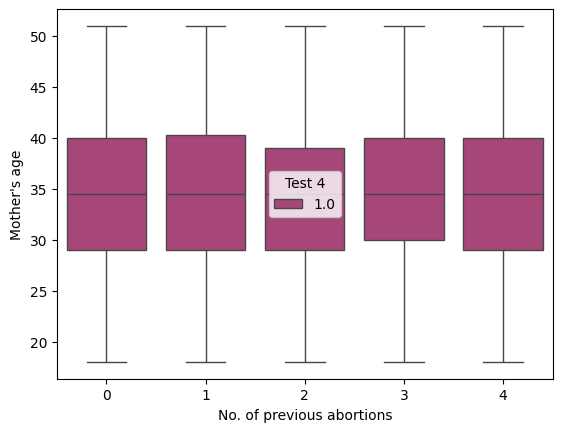

In [80]:
sns.boxplot(x = num['No. of previous abortions'], y=num["Mother's age"], hue = tests, palette='magma' )

In [81]:
num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'No. of previous abortions'],
      dtype='object')

In [82]:
symptoms = df[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5']]
symptoms.head()

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,1.0,1.0,1.0,1.0,1.0
1,1.0,NaN,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,NaN


In [83]:
corr_symptoms = symptoms.corr()
corr_symptoms.style.background_gradient(cmap='magma')

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Symptom 1,1.000000,0.002014,0.005559,-0.000530,0.015840
Symptom 2,0.002014,1.000000,0.008689,0.014627,0.011601
Symptom 3,0.005559,0.008689,1.000000,0.002794,0.028203
Symptom 4,-0.000530,0.014627,0.002794,1.000000,0.036785
Symptom 5,0.015840,0.011601,0.028203,0.036785,1.000000


DISEASE ANALYSIS

In [84]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [85]:
df_disorders = df.groupby('Disorder Subclass')['Genetic Disorder'].value_counts()
df_disorders

,,count
Disorder Subclass,Genetic Disorder,
Alzheimer's,Multifactorial genetic inheritance disorders,133
Cancer,Multifactorial genetic inheritance disorders,91
Cystic fibrosis,Single-gene inheritance diseases,3145
Diabetes,Multifactorial genetic inheritance disorders,1653
Hemochromatosis,Single-gene inheritance diseases,1228
Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,587
Leigh syndrome,Mitochondrial genetic inheritance disorders,4683
Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,3971
Tay-Sachs,Single-gene inheritance diseases,2556


In [86]:
cancer = df[df['Disorder Subclass'] == 'Cancer']
cancer.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
107,13.0,Yes,No,No,No,4.970532,42.0,24.0,Lemuel Shattuck Hospital,"1153 CENTRE ST\nJAMAICA PLAIN, MA 02130\n(42.3...",...,Singular,10.711108,normal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
283,12.0,Yes,No,No,No,5.015183,NaN,NaN,Not applicable,-,...,NaN,3.480522,abnormal,NaN,0.0,NaN,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
304,4.0,No,No,No,No,4.688240,45.0,NaN,NaN,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,NaN,11.531087,inconclusive,0.0,NaN,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
513,2.0,Yes,No,Yes,No,5.058617,48.0,57.0,Not applicable,-,...,Singular,6.327895,normal,0.0,0.0,NaN,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [87]:
cancer_num = cancer.select_dtypes(exclude='object')
cancer_num.shape

(97, 16)

In [88]:
cancer_num.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

<Axes: xlabel='Blood cell count (mcL)', ylabel='Count'>

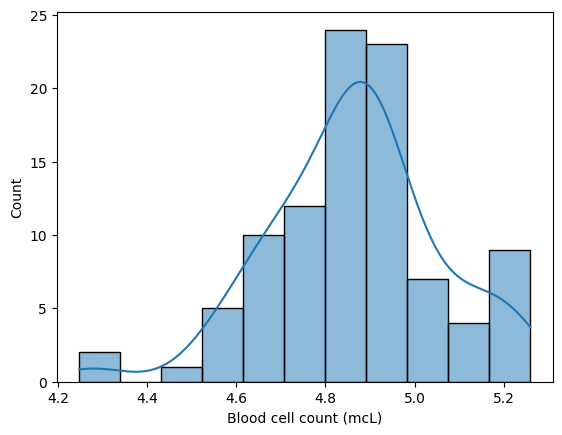

In [89]:
sns.histplot(x='Blood cell count (mcL)', kde=True, data=cancer_num, palette='magma')

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Count'>

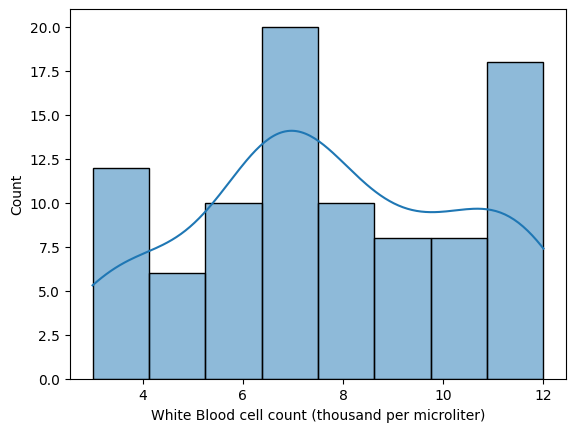

In [90]:
sns.histplot(x='White Blood cell count (thousand per microliter)', kde=True, data=cancer_num, palette='magma')

In [91]:
# cancer and maternal and paternal genes

cancer_genes = cancer[['Maternal gene', 'Paternal gene']]
cancer_genes

,Maternal gene,Paternal gene
4,NaN,Yes
107,No,No
283,No,No
304,No,No
513,Yes,No
...,...,...
21185,No,No
21356,No,No
21408,No,No
21478,No,No


<Axes: xlabel='Maternal gene', ylabel='count'>

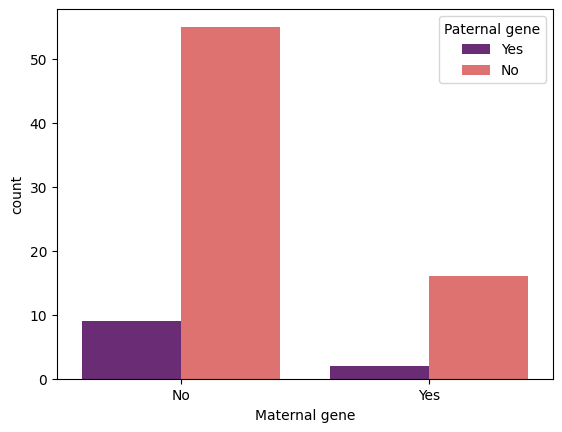

In [92]:
sns.countplot(x='Maternal gene',hue='Paternal gene', data=cancer_genes, palette='magma')

In [93]:
# symptoms and cancer

cancer_symptoms = cancer[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5']]
cancer_symptoms.value_counts()

cancer_symptoms = cancer_symptoms.dropna()
cancer_symptoms.head()

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
107,0.0,0.0,0.0,0.0,0.0
553,1.0,0.0,0.0,0.0,0.0
1162,0.0,0.0,0.0,0.0,0.0
2139,0.0,0.0,0.0,0.0,0.0
2267,0.0,0.0,1.0,0.0,0.0


In [94]:
df_disorders

,,count
Disorder Subclass,Genetic Disorder,
Alzheimer's,Multifactorial genetic inheritance disorders,133
Cancer,Multifactorial genetic inheritance disorders,91
Cystic fibrosis,Single-gene inheritance diseases,3145
Diabetes,Multifactorial genetic inheritance disorders,1653
Hemochromatosis,Single-gene inheritance diseases,1228
Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,587
Leigh syndrome,Mitochondrial genetic inheritance disorders,4683
Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,3971
Tay-Sachs,Single-gene inheritance diseases,2556


In [95]:
df_disorders["Alzheimer's"]

,count
Genetic Disorder,
Multifactorial genetic inheritance disorders,133


In [96]:
alzheimer = df[df['Disorder Subclass'] == "Alzheimer's"]
alzheimer.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
202,14.0,Yes,Yes,Yes,Yes,4.826227,47.0,58.0,Massachusetts Eye & Ear Infirmary,"1200 Centre St\nRoslindale, MA 02131\n(42.2973...",...,Multiple,5.178027,inconclusive,1.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Alzheimer's
306,9.0,Yes,Yes,NaN,Yes,4.870173,NaN,NaN,Boston City Hospital,"750 WASHINGTON ST\nCENTRAL, MA 02111\n(42.3499...",...,NaN,5.497112,slightly abnormal,1.0,1.0,NaN,1.0,1.0,Multifactorial genetic inheritance disorders,Alzheimer's
380,10.0,Yes,No,No,Yes,4.962701,19.0,NaN,Va Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,Singular,3.000000,slightly abnormal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Alzheimer's
405,0.0,Yes,Yes,Yes,Yes,4.687219,29.0,44.0,Not applicable,-,...,NaN,10.270923,inconclusive,1.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Alzheimer's
525,6.0,Yes,Yes,No,No,4.704889,34.0,57.0,Shriners Burns Institute,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",...,Singular,9.024526,slightly abnormal,1.0,1.0,1.0,1.0,NaN,Multifactorial genetic inheritance disorders,Alzheimer's


In [97]:
# birth defects vs alzheimers

alzheimer_birth = alzheimer['Birth defects']
alzheimer_birth.value_counts()

,count
Birth defects,
Singular,81
Multiple,59


In [98]:
df['Institute Name'].value_counts()

,count
Institute Name,
Not applicable,8440
Franciscan Children's Hospital,363
Carney Hospital,357
New England Medical Center,350
Hebrew Rehabilitation Center,349
VA Hospital,344
Shriners Burns Institute,341
Massachusetts Eye & Ear Infirmary,337
Brigham And Women's Hospital,334


In [99]:

mass_general = df[df['Institute Name'] == "Massachusetts General Hospital"]
mass_general

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
93,9.0,No,No,Yes,No,4.999788,51.0,27.0,Massachusetts General Hospital,"750 WASHINGTON ST\nCENTRAL, MA 02111\n(42.3499...",...,Multiple,6.746098,normal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
166,2.0,Yes,No,Yes,Yes,4.988560,47.0,49.0,Massachusetts General Hospital,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",...,Singular,5.467502,abnormal,1.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
232,14.0,No,No,No,No,4.987643,40.0,27.0,Massachusetts General Hospital,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",...,Multiple,10.288447,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,NaN
235,0.0,No,No,No,Yes,5.103858,NaN,39.0,Massachusetts General Hospital,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",...,Singular,3.585694,NaN,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21827,8.0,Yes,Yes,No,No,4.747883,24.0,46.0,Massachusetts General Hospital,"818 HARRISON AV\nSOUTH END, MA 02118\n(42.3359...",...,Multiple,11.849304,normal,0.0,1.0,0.0,1.0,1.0,Single-gene inheritance diseases,Cystic fibrosis
21832,12.0,Yes,Yes,Yes,Yes,4.840895,46.0,30.0,Massachusetts General Hospital,"125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(...",...,Multiple,8.331476,slightly abnormal,0.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
21852,NaN,No,No,No,No,4.845462,19.0,NaN,Massachusetts General Hospital,"75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.3...",...,Multiple,8.949926,inconclusive,0.0,NaN,0.0,NaN,1.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
21920,7.0,Yes,Yes,Yes,No,4.994396,42.0,31.0,Massachusetts General Hospital,"75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.3...",...,Singular,3.000000,abnormal,1.0,1.0,0.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy


In [100]:
df_disorders


,,count
Disorder Subclass,Genetic Disorder,
Alzheimer's,Multifactorial genetic inheritance disorders,133
Cancer,Multifactorial genetic inheritance disorders,91
Cystic fibrosis,Single-gene inheritance diseases,3145
Diabetes,Multifactorial genetic inheritance disorders,1653
Hemochromatosis,Single-gene inheritance diseases,1228
Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,587
Leigh syndrome,Mitochondrial genetic inheritance disorders,4683
Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,3971
Tay-Sachs,Single-gene inheritance diseases,2556


In [101]:
#cystic fibrosis

cf = df[df['Disorder Subclass'] == 'Cystic fibrosis']
cf.head()


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
11,7.0,No,No,No,Yes,4.848795,NaN,NaN,Not applicable,-,...,Multiple,8.409691,slightly abnormal,0.0,1.0,1.0,1.0,1.0,Single-gene inheritance diseases,Cystic fibrosis
16,0.0,Yes,Yes,No,No,4.798520,NaN,57.0,New England Medical Center,"125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(...",...,Multiple,NaN,normal,1.0,1.0,1.0,NaN,1.0,Single-gene inheritance diseases,Cystic fibrosis
17,NaN,No,No,No,No,4.952457,24.0,24.0,NaN,-,...,NaN,10.031078,inconclusive,1.0,1.0,0.0,1.0,1.0,Single-gene inheritance diseases,Cystic fibrosis


In [102]:
cf['Birth defects'].value_counts()

,count
Birth defects,
Multiple,1581
Singular,1543


([<matplotlib.patches.Wedge at 0x7e472ad527d0>,
 [Text(-0.021016392664593302, 1.0997992140565331, 'Multiple'),
  Text(0.021016392664593167, -1.0997992140565331, 'Singular')],
 [Text(-0.011463486907959982, 0.5998904803944726, '50.6%'),
  Text(0.011463486907959907, -0.5998904803944726, '49.4%')])

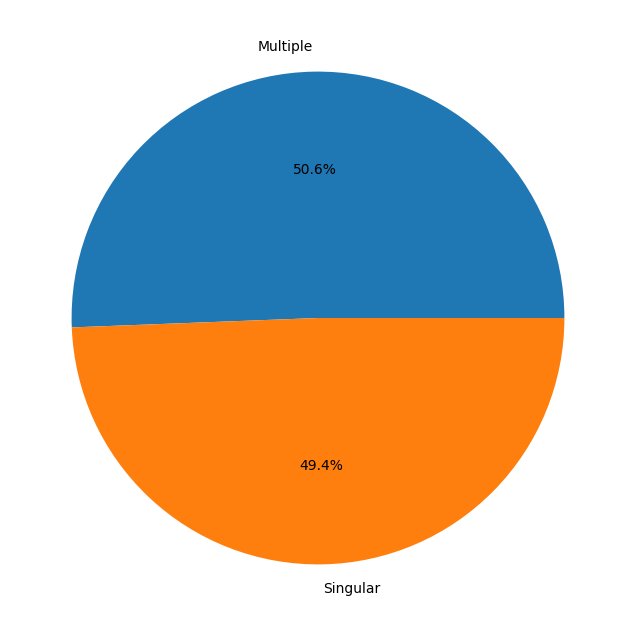

In [103]:
plt.figure(figsize=(10,8))
plt.pie(cf['Birth defects'].value_counts(), labels=cf['Birth defects'].value_counts().index, autopct='%1.1f%%')

In [104]:
# cf and genes

cf_genes = cf[['Maternal gene', 'Paternal gene']]
cf_genes.head()

,Maternal gene,Paternal gene
1,No,No
5,Yes,No
11,No,Yes
16,No,No
17,No,No


<Axes: xlabel='Maternal gene', ylabel='count'>

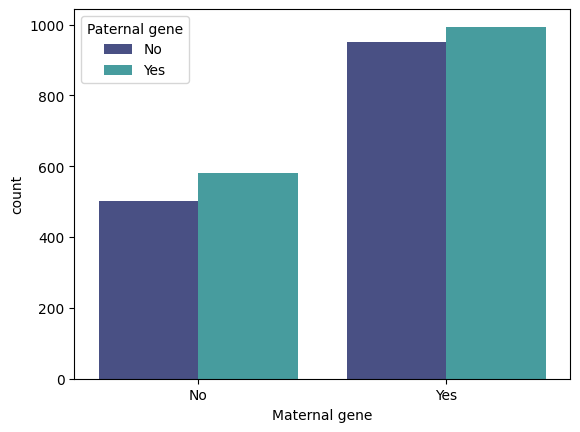

In [105]:
sns.countplot(x='Maternal gene',hue='Paternal gene', data=cf_genes, palette='mako')

In [106]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='ob

In [107]:
cat.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [111]:
encoded = pd.get_dummies(cat, columns=['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min']) # Corrected column name
encoded.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Institute Name,Location of Institute,Status,Parental consent,Follow-up,Gender,...,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass,Respiratory Rate (breaths/min)_Normal (30-60),Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Normal,Heart Rate (rates/min_Tachycardia
0,Yes,No,Yes,No,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Yes,High,Ambiguous,...,No,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,True,False,True,False
1,Yes,Yes,No,No,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Yes,High,Ambiguous,...,No,Yes,Multiple,normal,Mitochondrial genetic inheritance disorders,Cystic fibrosis,False,True,True,False
2,Yes,No,No,No,Not applicable,-,Alive,Yes,Low,Ambiguous,...,Yes,Yes,Singular,normal,Multifactorial genetic inheritance disorders,Diabetes,True,False,False,True
3,Yes,No,Yes,No,Not applicable,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Yes,High,Male,...,Yes,Yes,Singular,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,False,True,True,False
4,Yes,No,Yes,Yes,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Yes,Low,Male,...,Yes,No,Multiple,slightly abnormal,Multifactorial genetic inheritance disorders,Cancer,False,True,False,True


In [112]:
encoded = encoded.drop(columns='Location of Institute', axis=1)

In [113]:
encoded.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Institute Name', 'Status', 'Parental consent',
       'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass',
       'Respiratory Rate (breaths/min)_Normal (30-60)',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Normal', 'Heart Rate (rates/min_Tachycardia'],
      dtype='object')

In [114]:
mental = df['H/O serious maternal illness']
mental.head()

,H/O serious maternal illness
0,NaN
1,Yes
2,No
3,Yes
4,Yes


In [115]:
mental_illness = mental.dropna()
mental_illness.head()

,H/O serious maternal illness
1,Yes
2,No
3,Yes
4,Yes
5,No


In [116]:
mental_illness.value_counts()

,count
H/O serious maternal illness,
No,10012
Yes,9919


In [119]:
cancer_and_mental_illness = df[df['H/O serious maternal illness'].notna() & (df['Disorder Subclass'] == 'Cancer')]

In [120]:
cancer_and_mental_illness.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
283,12.0,Yes,No,No,No,5.015183,NaN,NaN,Not applicable,-,...,NaN,3.480522,abnormal,NaN,0.0,NaN,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
304,4.0,No,No,No,No,4.688240,45.0,NaN,NaN,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,NaN,11.531087,inconclusive,0.0,NaN,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
513,2.0,Yes,No,Yes,No,5.058617,48.0,57.0,Not applicable,-,...,Singular,6.327895,normal,0.0,0.0,NaN,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
553,7.0,Yes,No,NaN,No,4.966875,51.0,47.0,NaN,"818 HARRISON AV\nSOUTH END, MA 02118\n(42.3359...",...,Multiple,6.930982,abnormal,1.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [121]:
cm = cancer_and_mental_illness
cm_num = cm.select_dtypes(exclude='object')
cm_num.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
4,11.0,4.720703,32.0,NaN,0.0,0.0,0.0,1.0,0.0,4.0,4.098210,0.0,0.0,0.0,0.0,NaN
283,12.0,5.015183,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,3.480522,NaN,0.0,NaN,0.0,0.0
304,4.0,4.688240,45.0,NaN,0.0,0.0,0.0,NaN,NaN,3.0,11.531087,0.0,NaN,0.0,0.0,0.0
513,2.0,5.058617,48.0,57.0,0.0,0.0,0.0,1.0,0.0,4.0,6.327895,0.0,0.0,NaN,0.0,0.0
553,7.0,4.966875,51.0,47.0,0.0,0.0,NaN,1.0,0.0,0.0,6.930982,1.0,0.0,0.0,0.0,0.0


In [122]:
cm_num['White Blood cell count (thousand per microliter)'].value_counts()

,count
White Blood cell count (thousand per microliter),
12.000000,6
3.000000,6
4.098210,1
6.470661,1
7.745894,1
...,...
9.694821,1
7.357842,1
6.452673,1


In [123]:
df_disorders

,,count
Disorder Subclass,Genetic Disorder,
Alzheimer's,Multifactorial genetic inheritance disorders,133
Cancer,Multifactorial genetic inheritance disorders,91
Cystic fibrosis,Single-gene inheritance diseases,3145
Diabetes,Multifactorial genetic inheritance disorders,1653
Hemochromatosis,Single-gene inheritance diseases,1228
Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,587
Leigh syndrome,Mitochondrial genetic inheritance disorders,4683
Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,3971
Tay-Sachs,Single-gene inheritance diseases,2556


In [124]:
diabetes = df[df['Disorder Subclass'] == 'Diabetes']
diabetes.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
9,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 02131\n(42.2973...",...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
37,10.0,Yes,Yes,Yes,No,4.828440,51.0,NaN,Massachusetts Eye & Ear Infirmary,"49 ROBINWOOD AV\nJAMAICA PLAIN, MA 02130\n(42....",...,Singular,4.829049,slightly abnormal,1.0,1.0,1.0,NaN,1.0,Multifactorial genetic inheritance disorders,Diabetes
58,5.0,Yes,Yes,Yes,Yes,4.771483,47.0,NaN,Not applicable,-,...,Multiple,10.682594,slightly abnormal,NaN,1.0,NaN,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
77,5.0,No,No,No,Yes,4.851361,42.0,34.0,Massachusetts Eye & Ear Infirmary,"59 TOWNSEND ST\nROXBURY, MA 02119\n(42.3185628...",...,Singular,6.097961,inconclusive,1.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [131]:
# symptoms and diabetes

diabetes_symptoms = diabetes[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5']]
ds = diabetes_symptoms.value_counts()

diabetes_symptoms = diabetes_symptoms.dropna()
diabetes_symptoms

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
2,0.0,1.0,1.0,1.0,1.0
9,0.0,0.0,1.0,1.0,1.0
77,1.0,1.0,1.0,1.0,1.0
116,1.0,1.0,0.0,1.0,0.0
125,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
22040,1.0,1.0,1.0,1.0,0.0
22068,1.0,1.0,1.0,1.0,1.0
22070,0.0,1.0,1.0,1.0,1.0
22079,1.0,1.0,1.0,1.0,0.0


In [136]:
ds.describe()

,count
count,19.000000
mean,62.684211
std,71.978432
min,1.000000
25%,16.000000
50%,25.000000
75%,126.500000
max,248.000000


In [138]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1817 entries, 2 to 22082
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       1692 non-null   float64
 1   Genes in mother's side                            1817 non-null   object 
 2   Inherited from father                             1794 non-null   object 
 3   Maternal gene                                     1595 non-null   object 
 4   Paternal gene                                     1817 non-null   object 
 5   Blood cell count (mcL)                            1817 non-null   float64
 6   Mother's age                                      1358 non-null   float64
 7   Father's age                                      1362 non-null   float64
 8   Institute Name                                    1427 non-null   object 
 9   Location of Institute  

In [140]:
df_disorders

,,count
Disorder Subclass,Genetic Disorder,
Alzheimer's,Multifactorial genetic inheritance disorders,133
Cancer,Multifactorial genetic inheritance disorders,91
Cystic fibrosis,Single-gene inheritance diseases,3145
Diabetes,Multifactorial genetic inheritance disorders,1653
Hemochromatosis,Single-gene inheritance diseases,1228
Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,587
Leigh syndrome,Mitochondrial genetic inheritance disorders,4683
Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,3971
Tay-Sachs,Single-gene inheritance diseases,2556


In [141]:
# hemochromatosis

hemo = df[df['Disorder Subclass'] == 'Hemochromatosis']
hemo.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
10,6.0,Yes,No,NaN,No,4.750824,NaN,NaN,Not applicable,-,...,Singular,5.957321,abnormal,1.0,NaN,0.0,0.0,NaN,Single-gene inheritance diseases,Hemochromatosis
19,6.0,No,Yes,Yes,Yes,4.876896,36.0,48.0,VA Hospital,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",...,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis
20,2.0,No,No,Yes,No,4.808872,NaN,30.0,Not applicable,-,...,NaN,9.566103,slightly abnormal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Hemochromatosis
44,9.0,Yes,No,Yes,No,4.970435,50.0,51.0,Not applicable,-,...,Multiple,11.648665,abnormal,0.0,1.0,NaN,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis
50,9.0,No,Yes,No,Yes,5.028235,30.0,50.0,New England Baptist Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",...,Singular,7.237478,abnormal,0.0,0.0,0.0,0.0,1.0,Single-gene inheritance diseases,Hemochromatosis


In [144]:
hemo_blood_test = hemo['Blood test result'].value_counts()

<Axes: xlabel='Blood test result'>

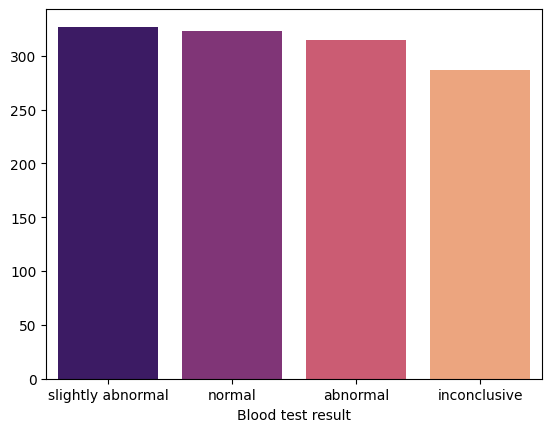

In [146]:
sns.barplot(x=hemo_blood_test.index, y=hemo_blood_test.values, palette='magma')

In [152]:
white_blood_sample = hemo['White Blood cell count (thousand per microliter)'].sample(100)
white_blood_sample

df_wbs = pd.DataFrame(white_blood_sample)
df_wbs

,White Blood cell count (thousand per microliter)
6398,NaN
21177,9.231183
15524,3.000000
9207,3.000000
12649,NaN
...,...
5829,5.534540
14599,7.364213
8013,NaN
13602,12.000000


In [158]:
df_samp = df.sample(100)

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Blood cell count (mcL)'>

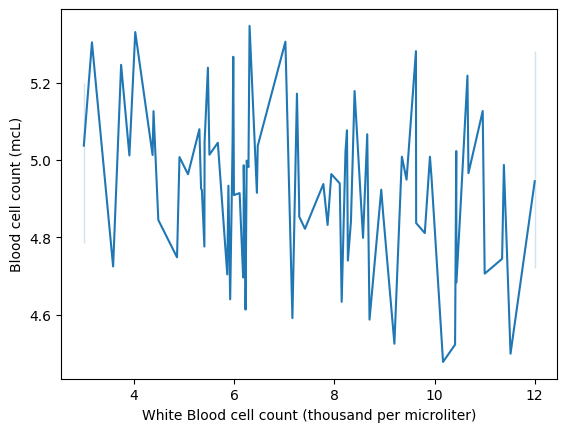

In [159]:
sns.lineplot(x='White Blood cell count (thousand per microliter)',y='Blood cell count (mcL)', data=df_samp, palette='crest')